## Problem Statement

Understanding the prevalence of overweight and obesity, as defined by the World Health Organization, is crucial for public health. This study aims to identify key factors contributing to high BMI values and obesity. By analyzing gender, age, height, weight, hereditary factors, and dietary habits like High Calorie Food Intake Frequency (HCFIF), we seek to uncover patterns and correlations that can inform interventions and preventive strategies. The ultimate goal is to mitigate the burden of obesity-related diseases by addressing its root causes through targeted interventions and lifestyle modifications.

## Data Definition

gender - gender of the individual. Female-f/ Male-m

age - age of the individual. Numeric

height -  height of the individual. Numeric (cm)

weight - weight of the individual. Numeric (kg)

hereditary - Has a family member suffered or suffers from overweight?

HCFIF - do take High Calorie Food Intake Frequently? 

BMI - Body mass Index of Indivivual?

Obesity - Is Person Underweight / Not Obese / Obese.

## Import Libraries

In [45]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 


# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

## Read the Data

In [48]:
df = pd.read_excel('data.xlsx')
df.head()

,gender,age,height,weight,Hereditary,HCFIF,BMI,Obesity
0,m,33,167,45,y,n,16.135394,Under Weight
1,m,21,177,88,y,y,28.088991,obese
2,m,25,178,92,y,y,29.036738,obese
3,m,25,167,66,n,n,23.665244,Not Obese
4,f,22,144,66,n,n,31.828704,obese


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      101 non-null    object 
 1   age         101 non-null    int64  
 2   height      101 non-null    int64  
 3   weight      101 non-null    int64  
 4   Hereditary  101 non-null    object 
 5   HCFIF       101 non-null    object 
 6   BMI         101 non-null    float64
 7   Obesity     101 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [52]:
df.shape

(101, 8)

In [54]:
df.duplicated().sum()

0

In [56]:
df.isnull().sum()

gender        0
age           0
height        0
weight        0
Hereditary    0
HCFIF         0
BMI           0
Obesity       0
dtype: int64

## Bivariate Analysis 

In [59]:
### Identify whether Weight has any impact on BMI of a person Using relevant plot ?
### Identify whether hereditary has any impact on BMI of a person Using relevant plot ?
### Identify whether HCFIF has any impact on BMI of a person Using relevant plot ?
### Identify whether BMI has any impact on Obesity of a person Using relevant plot ?
### Identify whether HCFIF & Obesity has any relationship among them using relevant plots ?

#### Identify whether Weight has any impact on BMI of a person Using relevant Plots ?

In [62]:
df['weight'].corr(df['BMI'])

0.6447565303873544

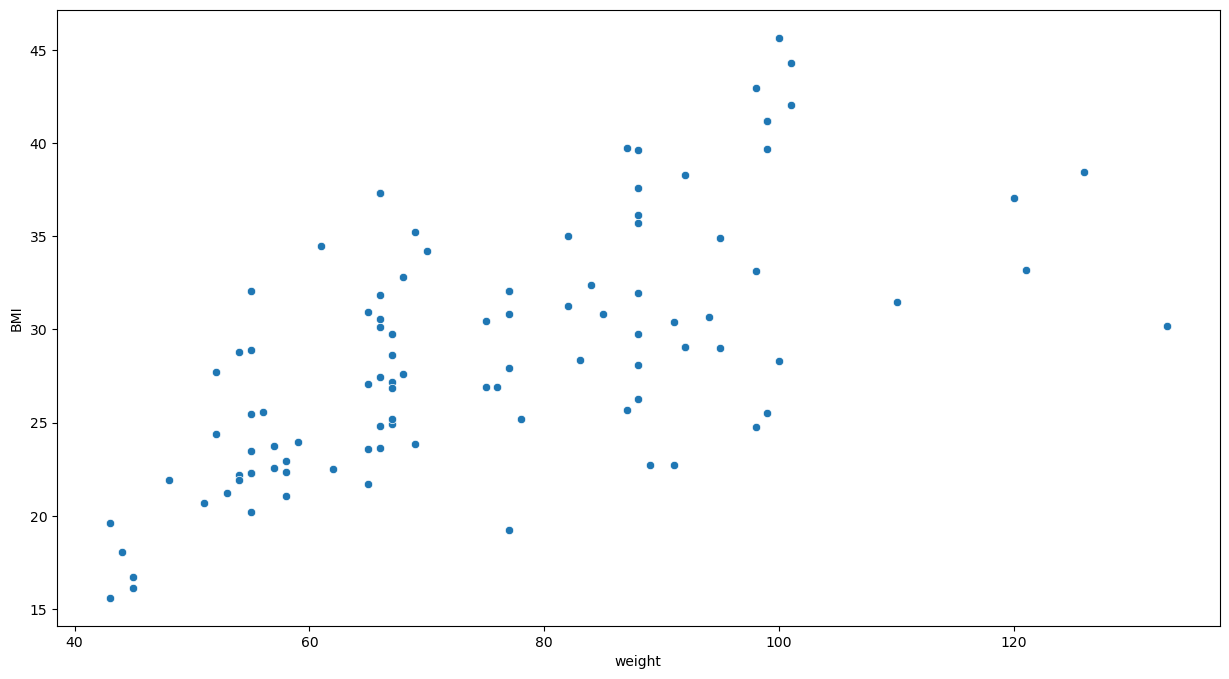

In [64]:
sns.scatterplot(x = df['weight'], y = df['BMI'])
plt.show()

In [66]:
#weight has a positive relationship with the BMI of a person; it has an impact.

#### Identify whether hereditary has any impact on BMI of a person Using relevant Plots ?

In [69]:
#h0 : mu1 = mu2
#h0 : mu1 != mu2

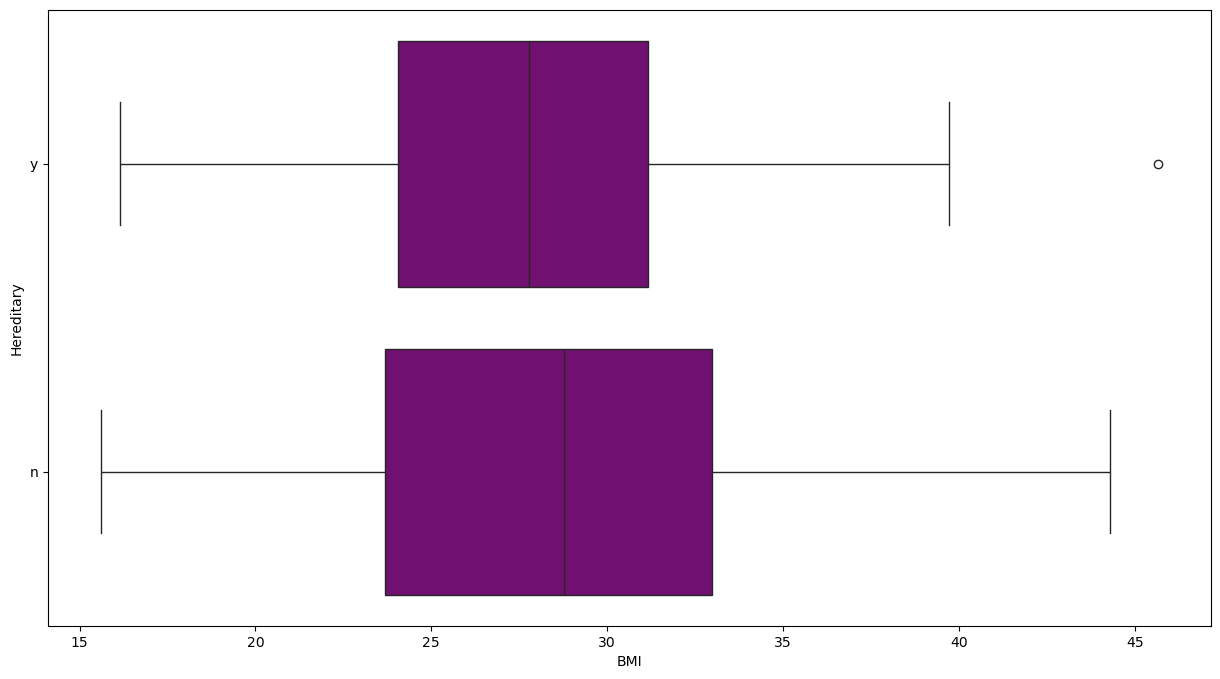

In [71]:
sns.boxplot(y = df['Hereditary'], x = df['BMI'], color = 'purple')
plt.show()

In [73]:
df['BMI'].skew()

0.4014275054878931

In [75]:
#therefore we can conclude that hereditary does not have any impact on BMI of a person

#### Identify whether HCFIF has any impact on BMI of a person Using relevant Plots ?

In [78]:
#h0 : mu1 = mu2
#h0 : mu1 != mu2

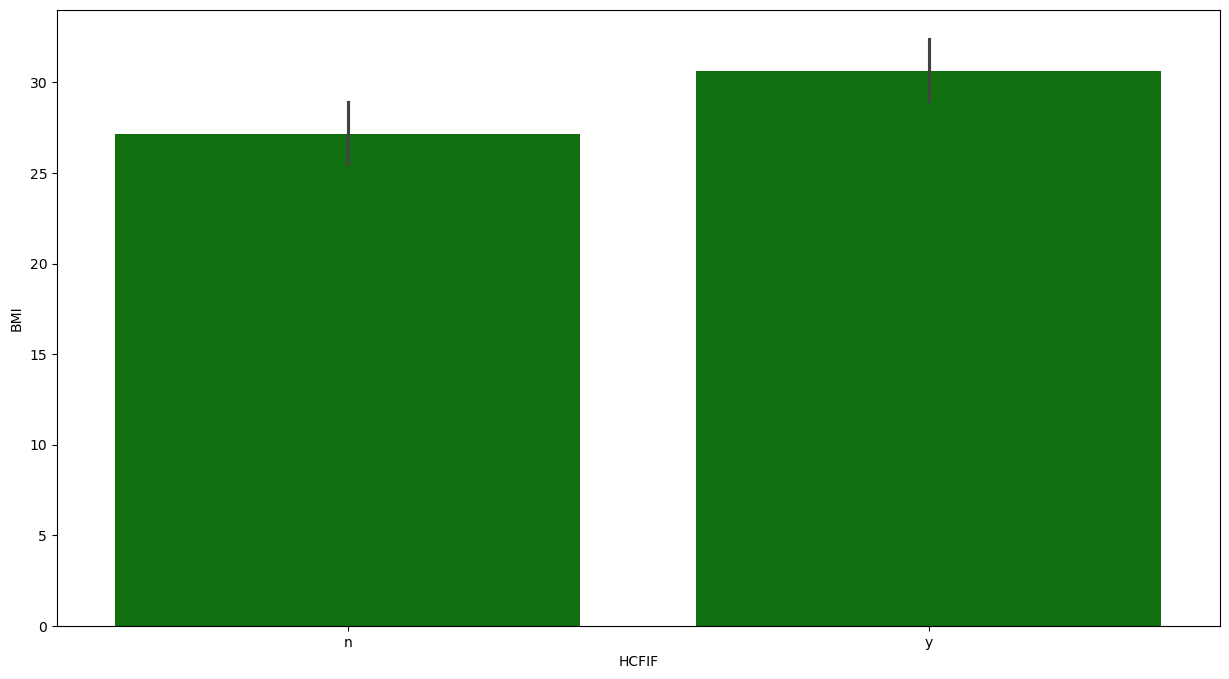

In [80]:
sns.barplot(x = df['HCFIF'], y = df['BMI'], color = 'green')
plt.show()

In [82]:
#Therefore HCFIF does not have any impact on BMI of a person

#### Identify whether BMI has any impact on Obesity of a person Using relevant Plots ?

In [85]:
#h0 : mu1 = mu2 = mu3
#h0 : mu1 != mu2 != mu3

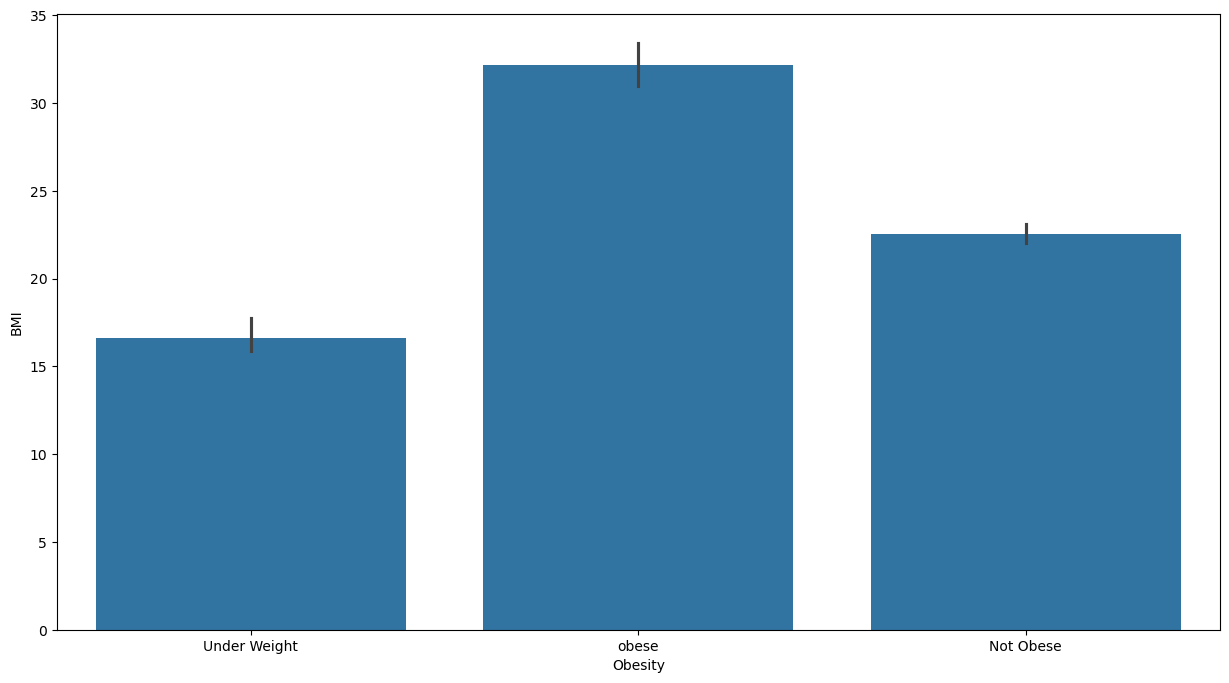

In [87]:
sns.barplot(x = df['Obesity'], y = df['BMI'])
plt.show()

In [89]:
#therefore we can conclude that the BMI of a person does not impact if they're obese or not

#### Identify whether HCFIF & Obesity has any relationship among them using relevant plots ?

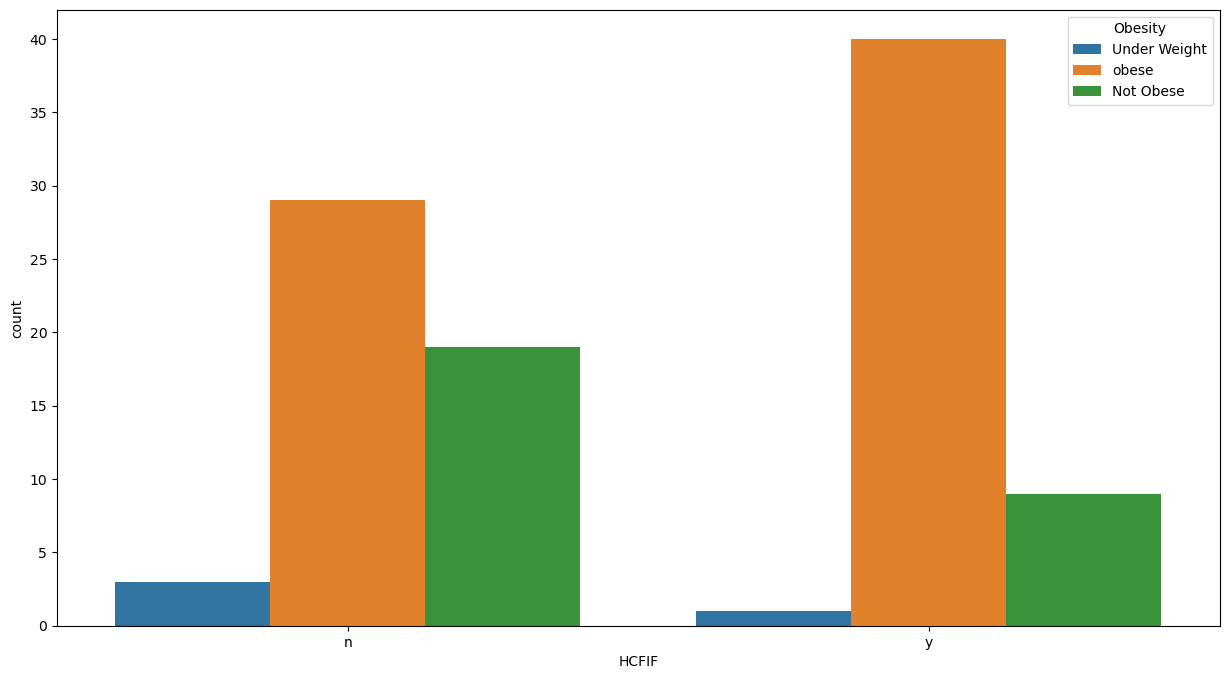

In [92]:
sns.countplot(x = df['HCFIF'], hue = df['Obesity'])
plt.show()

Obesity  Not Obese  Under Weight  obese
HCFIF                                  
n               19             3     29
y                9             1     40


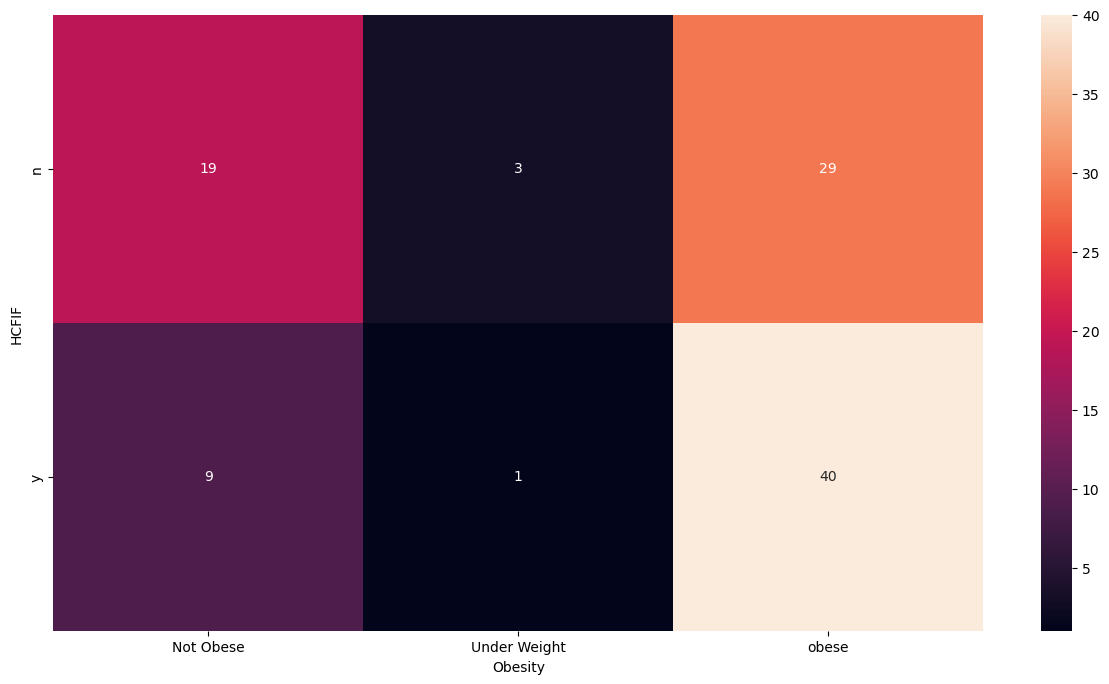

In [94]:
crosstab = pd.crosstab(df['HCFIF'], df['Obesity'])

sns.heatmap( data = crosstab, annot = True)
print(crosstab)

In [96]:
print(crosstab)

Obesity  Not Obese  Under Weight  obese
HCFIF                                  
n               19             3     29
y                9             1     40


In [98]:
df.groupby('HCFIF')['Obesity'].value_counts(normalize = True).unstack()

Obesity,Not Obese,Under Weight,obese
HCFIF,,,
n,0.372549,0.058824,0.568627
y,0.180000,0.020000,0.800000


### Identifying STATISTICALLY SIGNIFICANT Variables 

#### Is age statistically significant in predicting BMI?

In [104]:
#h0: The coefficient for age is 0 (i.e., age is not a statistically significant predictor of BMI).
#ha: The coefficient for age is not 0 (i.e., age is a statistically significant predictor of BMI).

In [118]:
#Preparing the data for regression
X = df['age']
X = sm.add_constant(X)
y = df['BMI']

model = sm.OLS(y, X).fit()

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                 0.0001479
Date:                Tue, 10 Dec 2024   Prob (F-statistic):              0.990
Time:                        23:48:11   Log-Likelihood:                -333.04
No. Observations:                 101   AIC:                             670.1
Df Residuals:                      99   BIC:                             675.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9050      1.853     15.602      0.000      25.229      32.581
age           -0.0005      0.038     -0.012      0.990      -0.075       0.074
==============================================================================
Omnibus:                        3.063   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                3.068
Skew:                           0.395   Prob(JB):                        0.216
Kurtosis:                       2.678   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
model.pvalues['age']

0.9903204057528461

In [126]:
a = 0.05
pval = 0.9903204057528461
if pval < a:
    print("The null hypothesis is rejected")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


In [128]:
#therefore we can conclude that age is not statistically significant in predicting BMI

#### Is weight statistically significant in predicting BMI?

In [ ]:
#h0: The coefficient for weight is 0 (i.e., age is not a statistically significant predictor of BMI).
#ha: The coefficient for weight is not 0 (i.e., age is a statistically significant predictor of BMI).

In [135]:
#Preparing the data for regression
X = df['weight']
X = sm.add_constant(X) 

y = df['BMI']

model = sm.OLS(y, X).fit()

In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     70.44
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           3.43e-13
Time:                        23:51:00   Log-Likelihood:                -305.91
No. Observations:                 101   AIC:                             615.8
Df Residuals:                      99   BIC:                             621.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6189      2.002      6.303      0.000       8.646      16.592
weight         0.2162      0.026      8.393      0.000       0.165       0.267
==============================================================================
Omnibus:                        1.940   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.878
Skew:                           0.254   Prob(JB):                        0.391
Kurtosis:                       2.565   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
model.pvalues['weight']

3.4344059901305074e-13

In [141]:
pval = 3.4344059901305074e-13
if pval < a:
    print("The null hypothesis is rejected")
else:
    print("We have failed to reject the null hypothesis")

The null hypothesis is rejected


In [143]:
#therefore we can conclude that weight is not statistically significant in predicting BMI

#### Is HCFIF statistically significant in predicting BMI?

In [90]:
yes = df[df['HCFIF']=='y']['BMI']
no = df[df['HCFIF']=='n']['BMI']

In [92]:
print(yes.shape,no.shape)

(50,) (51,)


In [3]:
# For cat vs num, the parametric test is 2-Sample Independent t-test:
# Assumptions for Parametric Test:

In [94]:
print(stats.shapiro(yes))
print(stats.shapiro(no))

ShapiroResult(statistic=0.9514047079636958, pvalue=0.038974433878591855)
ShapiroResult(statistic=0.9753274412186888, pvalue=0.3628555549691381)


In [70]:
stats.levene(yes,no)

LeveneResult(statistic=0.003367733548886417, pvalue=0.9538399713237141)

In [4]:
# Parametric Test (2-Sample Independent t-test)

# Step 1: Check the Assumptions:
# Data is Normal (True)
# Population Standard Deviation is not known (True)
# n < 30 (Not true, but in the real-world, we always prefer to use t-test over z-test. 
# We can use 2-Sample independent t-test

In [80]:
a = 0.05

In [74]:
#h0: y - n = 0
#h1: y - n != 0
stats.ttest_ind(yes,no)

TtestResult(statistic=2.7368356794176094, pvalue=0.007354464845912772, df=99.0)

In [82]:
pval = 0.007354464845912772
if pval < a:
    print("The null hypothesis is rejected")
else:
    print("We have failed to reject the null hypothesis")

The null hypothesis is rejected


In [ ]:
#therefore we can conclude that HCFIF is statistically significant in predicting BMI

#### Is hereditary statistically significant in predicting BMI?

In [11]:
# Parametric Test (2-Sample Independent t-test)

# Step 1: Check the Assumptions:
# Data is Normal (True)
# Population Standard Deviation is not known (True)
# n < 30 (Not true, but in the real-world, we always prefer to use t-test over z-test. 
# We can use 2-Sample independent t-test

In [12]:
# Step 2: Formation of Hypothesis:
#h0: Hereditary is not statistically significant in predicting BMI
#h1: Hereditary is statistically significant in predicting BMI

In [101]:
yes = df[df['Hereditary']=='y']['BMI']
no = df[df['Hereditary']=='n']['BMI']

In [103]:
print(yes.shape,no.shape)

(42,) (59,)


In [105]:
print(stats.shapiro(yes))
print(stats.shapiro(no))

ShapiroResult(statistic=0.966207396244314, pvalue=0.2449449117784481)
ShapiroResult(statistic=0.979969886809071, pvalue=0.4387249497876531)


In [107]:
stats.levene(yes,no)

LeveneResult(statistic=1.537061311336631, pvalue=0.2179864676219075)

In [10]:
# The data is normal and has equal variance, so we can proceed with the parametric test.

In [14]:
# Step 4: Calculating the Test Statistic (test_stat):

In [109]:
#h0: y - n = 0
#h1: y - n != 0
stats.ttest_ind(yes,no)

TtestResult(statistic=-0.3534474180692366, pvalue=0.7245045851224163, df=99.0)

In [16]:
# Step 5: Concluding the Hypothesis:

In [111]:
pval = 0.7245045851224163
if pval < a:
    print("The null hypothesis is rejected")
else:
    print("We have failed to reject the null hypothesis")

We have failed to reject the null hypothesis


In [ ]:
#we can conclude that it does not make a difference; 
#hereditary is not statistically significant in predicting BMI

#### Is BMI statistically significant in predicting Obese?

In [ ]:
#h0: all means are equal
#h0: all means are not equal

In [113]:
df['Obesity'].unique()

array(['Under Weight', 'obese', 'Not Obese'], dtype=object)

In [115]:
uw = df[df['Obesity']=='Under Weight']['BMI']
o = df[df['Obesity']=='obese']['BMI']
no = df[df['Obesity']=='Not Obese']['BMI']

In [117]:
print(uw.shape,o.shape,no.shape)

(4,) (69,) (28,)


In [119]:
print(stats.shapiro(uw))
print(stats.shapiro(o))
print(stats.shapiro(no))

ShapiroResult(statistic=0.9508958411560319, pvalue=0.7217156875621007)
ShapiroResult(statistic=0.9334310104422435, pvalue=0.0011862908010026423)
ShapiroResult(statistic=0.9669573317343301, pvalue=0.501795914259838)


In [121]:
stats.levene(uw,o,no)

LeveneResult(statistic=11.049143108047344, pvalue=4.707323144781285e-05)

In [123]:
stats.f_oneway(uw,o,no)

F_onewayResult(statistic=64.97768453366795, pvalue=1.0850162723354575e-18)

In [125]:
pval = 1.0850162723354575e-18
a = 0.05
if pval < a:
    print("The null hypothesis that all means of the samples are equal is rejected.")
else:
    print("We have failed to reject the null hypothesis that all means of the samples are equal.")

The null hypothesis that all means of the samples are equal is rejected.


In [127]:
import statsmodels.stats.multicomp as mc
mc.pairwise_tukeyhsd(df['BMI'], df['Obesity'], alpha = 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Not Obese,Under Weight,-5.9123,0.0336,-11.4531,-0.3714,True
Not Obese,obese,9.614,0.0,7.2913,11.9367,True
Under Weight,obese,15.5262,0.0,10.1952,20.8573,True


In [ ]:
#none of the means are equal

### Prove Central Limit Theorem considering left skewed data and 1000 samples with each sample size 1000 

In [17]:
# Central Limit Theroem states that as long as sample size is large enough, regardless of the population distribution,
# the sampling distribution (distribution of sample  means) follows normal distribution.
# Central Limit Theorem holds true for sample size greater than 30.

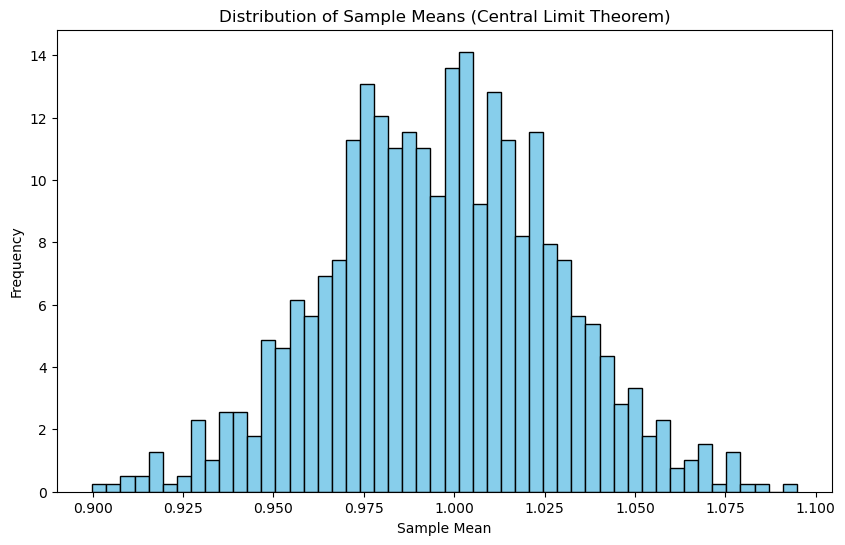

In [149]:
#Generating left-skewed data (using exponential distribution)
np.random.seed(42)  # For reproducibility
data = np.random.exponential(scale=1, size=100000)  # Exponentially distributed data (left-skewed)

#Taking 1,000 samples, each with a sample size of 1,000
sample_means = []
sample_size = 1000
num_samples = 1000

for _ in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

#Ploting the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, density=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()